In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn import preprocessing

In [23]:
data = pd.read_csv('./train_data/DATA.csv')
data = data[data.BMXWT != 0]

In [24]:
labels = (data['DXDTOLE']/data['BMXWT']) * 0.1
data['Label'] = labels
data = data.drop(['DXDTOLE'], axis=1)
data = data.fillna(0)

In [25]:
# 分別從train裡面取train & test
import numpy as np
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [26]:
for item in data.columns.tolist():
    if data[item].corr(data.Label) > 0.2:
        print(item + ": " + "%.4f" % data[item].corr(data.Label))
    if data[item].corr(data.Label) < -0.2:
        print(item + ": " + "%.4f" % data[item].corr(data.Label))

RIAGENDR: -0.5679
MCQ060: 0.2746
MCQ080: 0.2964
MCQ083: 0.2265
MCQ100: 0.2279
MCQ120A: 0.2702
MCQ120B: 0.2305
MCQ120C: 0.2785
MCQ120D: 0.2270
MCQ150G: 0.2449
MCQ160A: -0.2458
MCQ160B: -0.2569
MCQ160C: -0.2505
MCQ160D: -0.2564
MCQ160E: -0.2691
MCQ160F: -0.2775
MCQ160G: -0.2747
MCQ160H: -0.2713
MCQ160I: -0.2525
MCQ160K: -0.2682
MCQ160L: -0.2747
MCQ200: -0.2669
MCQ220: -0.2821
MCQ245A: -0.2066
MCQ250B: -0.2089
PAD200: -0.2583
PAD440: -0.2600
BMXWT: -0.2279
BMXHT: 0.2214
BMXBMI: -0.3671
BMXWAIST: -0.2579
BMXTRI: -0.3368
BMISUB: -0.2121
Label: 1.0000


In [27]:
train.to_csv('./train_data/train_data.csv', index = False)
test.to_csv('./train_data/test_data.csv', index = False)

In [28]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [29]:
train_x = train.iloc[:,0:-1].values #returns a numpy array
train_y = train.iloc[:,-1].values.reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_x)
train_df = pd.DataFrame(x_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train_y)
train_y = pd.DataFrame(x_scaled)

# test = test[test.Label != 0]
test_x = test.iloc[:,0:-1].values #returns a numpy array
test_y = test.iloc[:,-1].values.reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_x)
test_df = pd.DataFrame(x_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_y)
test_y = pd.DataFrame(x_scaled)

In [30]:
y_train = train_y.as_matrix()
x_train = train_df.iloc[:,:-1].as_matrix()
y_test = test_y.as_matrix()
x_test = test_df.iloc[:,:-1].as_matrix()

In [31]:
print(data.shape)

(6167, 368)


In [32]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
model = Sequential()
model.add(Dense(units=256, input_dim=366))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, input_dim=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, input_dim=128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, input_dim=64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, input_dim=32))
model.add(Activation('relu'))
model.add(Dense(units=1, input_dim=4))

In [33]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train, epochs=10, batch_size=64)
model.save_weights('./model/doctor.model')
# save and load weights
model.save_weights('./model/my_doctor_weights.h5')
model.load_weights('./model/my_doctor_weights.h5')

Epoch 1/10
4923/4923 [==============================] - 1s - loss: 0.0573 - mean_absolute_error: 0.1801      

In [34]:
from sklearn.metrics import mean_squared_error
print(x_test.shape)
predict_y = model.predict(x_test)
# show the inputs and predicted outputs
# for i in range(len(x_test)):
# 	print("Item=%s, Predicted=%s, True=%s" % (i, predict_y[i], y_test[i]))
print(mean_squared_error(y_test, predict_y))

(1244, 366)
0.0049236933919


In [35]:
def denormalize(df, normalized_value): 
    df = df.values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new



In [36]:
# test = test[test.Label != 0]
test_x = test.iloc[:,0:-1].values #returns a numpy array
test_y = test.iloc[:,-1].values.reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_x)
test_df = pd.DataFrame(x_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(test_y)
test_y = pd.DataFrame(x_scaled)
y_test = test_y.as_matrix()
x_test = test_df.iloc[:,:-1].as_matrix()
predict = denormalize(test.iloc[:,-1], predict_y)
true = denormalize(test.iloc[:,-1], y_test)

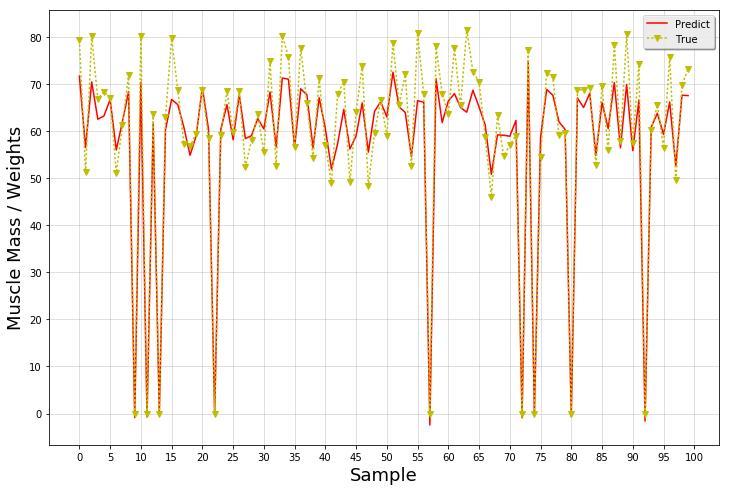

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

ts = []
for i in range(len(predict_y[:100])):
    ts.append(i)


# fig = plt.figure()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_xticks = np.arange(0, 101, 5)
minor_xticks = np.arange(0, 101, 0.1)

major_yticks = np.arange(0, 100, 10 )
minor_yticks = np.arange(0, 100, 0.1)

ax.set_xticks(major_xticks)
# ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
# ax.set_yticks(minor_yticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
plt.plot(ts, predict[:100],'r',ts, true[:100],'y:v') # 只有點
plt.xlabel('Sample',fontsize=18)
plt.ylabel('Muscle Mass / Weights',fontsize=18)

# plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.legend(('Predict', 'True'),shadow=True,frameon=True)
plt.savefig('compare.png')
plt.show()

In [ ]:
print(test.shape)